In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
import sys
sys.path.append(os.path.abspath('/content/gdrive/My Drive/Thesis'))

In [4]:
df = pd.read_csv("gdrive/MyDrive/Thesis/csv/en_climate_monthly_AB_3050520_1887-1995_P1M.csv")

In [ ]:
#list(df.columns)

In [5]:
df.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Mean Max Temp (°C),Mean Max Temp Flag,Mean Min Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow Grnd Last Day (cm),Snow Grnd Last Day Flag,Dir of Max Gust (10's deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-115.57,51.18,BANFF,3050520,1887-01,1887,1,NaN,NaN,NaN,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN
1,-115.57,51.18,BANFF,3050520,1887-02,1887,2,NaN,NaN,NaN,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN
2,-115.57,51.18,BANFF,3050520,1887-03,1887,3,NaN,NaN,NaN,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN
3,-115.57,51.18,BANFF,3050520,1887-04,1887,4,NaN,NaN,NaN,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN
4,-115.57,51.18,BANFF,3050520,1887-05,1887,5,NaN,NaN,NaN,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#data = df[["Date/Time", "Mean Max Temp (°C)"]].copy()
data = df.copy()

In [7]:
data.columns = ["x", "y", "station", "climateID", "date_time",
                                              "year", "month", "mean_MAX_temp_C", "mean_MAX_temp_FLAG",
                                              "mean_MIN_temp_C", "mean_MIN_temp_FLAG", "MEAN_TEMP_C",
                                              "MEAN_TEMP_FLAG", "extr_MAX_temp_C", "extr_MAX_temp_FLAG",
                                              "extr_MIN_temp_C", "extr_MIN_temp_FLAG", "total_rain_mm",
                                              "total_rain_FLAG", "total_snow_cm", "total_snow_FLAG", 
                                              "total_precip_mm", "total_precip_FLAG", "snow_ground_last_day_cm",
                                              "snow_ground_FLAG", "dir_max_gust", "dir_max_gust_FLAG",
                                              "speed_max_gust_km_h", "speed_max_gust_FLAG"]


In [ ]:
#data.head()

In [8]:
data = data[~(data['date_time'] < '1900-01-01')]

In [9]:
data = data.drop(["x", "y", "station", "year", "month", "mean_MAX_temp_FLAG", "mean_MIN_temp_FLAG", "MEAN_TEMP_FLAG", 
                  "extr_MAX_temp_FLAG", "extr_MIN_temp_FLAG", "total_rain_FLAG", 
                  "total_snow_FLAG", "total_precip_FLAG", "snow_ground_FLAG", 
                  "dir_max_gust_FLAG", "speed_max_gust_FLAG", "climateID", "snow_ground_last_day_cm", 
                  "dir_max_gust", "speed_max_gust_km_h"],axis=1)

In [10]:
data.head()

,date_time,mean_MAX_temp_C,mean_MIN_temp_C,MEAN_TEMP_C,extr_MAX_temp_C,extr_MIN_temp_C,total_rain_mm,total_snow_cm,total_precip_mm
157,1900-02,-3.3,-14.7,-9.0,5.6,-36.7,0.0,16.5,16.5
158,1900-03,3.4,-8.1,-2.4,12.8,-25.6,25.1,42.9,68.1
159,1900-04,11.9,-1.3,5.3,21.7,-5.6,19.3,18.5,37.8
160,1900-05,16.2,1.3,8.8,20.6,-2.8,22.1,0.0,22.1
161,1900-06,20.4,5.4,12.9,29.4,-2.2,118.1,0.0,118.1


In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean_MAX_temp_C,1129.0,8.518689,9.913528,-20.6,-0.2,9.3,17.20,26.6
mean_MIN_temp_C,1129.0,-3.685474,8.032294,-32.6,-10.1,-2.2,3.40,9.6
MEAN_TEMP_C,1129.0,2.419575,8.932659,-26.6,-5.2,3.5,10.30,17.9
extr_MAX_temp_C,1125.0,17.446222,9.459611,-7.2,8.3,18.3,26.10,34.4
extr_MIN_temp_C,1125.0,-14.470133,13.364296,-51.1,-26.1,-10.6,-2.20,5.0
total_rain_mm,1127.0,23.400355,28.514200,0.0,0.8,11.4,36.80,152.7
total_snow_cm,1127.0,17.791571,21.487184,0.0,0.0,11.7,26.85,157.0
total_precip_mm,1127.0,39.491748,27.123389,0.0,20.1,32.5,52.30,193.8


In [12]:
#data[data == np.inf].count()
# drop rows with all zeros
data = data.loc[(df!=0).any(1)]

<ipython-input-12-7e55de5b4286>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  data = data.loc[(df!=0).any(1)]


In [13]:
#data.isna().sum().sum()
data = data.dropna()

In [14]:
data.isna().sum()

date_time          0
mean_MAX_temp_C    0
mean_MIN_temp_C    0
MEAN_TEMP_C        0
extr_MAX_temp_C    0
extr_MIN_temp_C    0
total_rain_mm      0
total_snow_cm      0
total_precip_mm    0
dtype: int64

In [15]:
data.shape

(1125, 9)

In [16]:
data["date_time"] = pd.to_datetime(data["date_time"])
data.set_index(data["date_time"], inplace=True)
data.drop("date_time", axis=1, inplace=True)

In [17]:
cleaned_data = data

In [ ]:
# REFERENCE THIS BLOG
# https://chandlerzuo.github.io/blog/2017/11/darnn

In [18]:
sys.path.append(os.path.abspath('/content/gdrive/My Drive/Thesis/da_rnn'))

In [19]:
import custom_types, constants, modules, utils

2023-05-28 16:03:27,049 - VOC_TOPICS - INFO - Using computation device: cpu
2023-05-28 16:03:27,049 - VOC_TOPICS - INFO - Using computation device: cpu
2023-05-28 16:03:27,049 - VOC_TOPICS - INFO - Using computation device: cpu
2023-05-28 16:03:27,049 - VOC_TOPICS - INFO - Using computation device: cpu
2023-05-28 16:03:27,049 - VOC_TOPICS - INFO - Using computation device: cpu
2023-05-28 16:03:27,049 - VOC_TOPICS - INFO - Using computation device: cpu
2023-05-28 16:03:27,049 - VOC_TOPICS - INFO - Using computation device: cpu
2023-05-28 16:03:27,101 - VOC_TOPICS - INFO - Shape of data: (1125, 8).
Missing in data: 0.
2023-05-28 16:03:27,101 - VOC_TOPICS - INFO - Shape of data: (1125, 8).
Missing in data: 0.
2023-05-28 16:03:27,101 - VOC_TOPICS - INFO - Shape of data: (1125, 8).
Missing in data: 0.
2023-05-28 16:03:27,101 - VOC_TOPICS - INFO - Shape of data: (1125, 8).
Missing in data: 0.
2023-05-28 16:03:27,101 - VOC_TOPICS - INFO - Shape of data: (1125, 8).
Missing in data: 0.
2023-05-

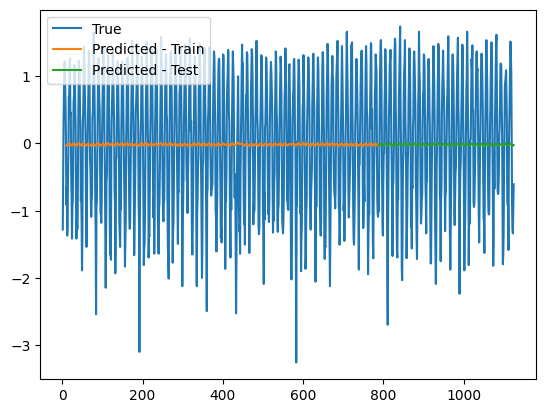

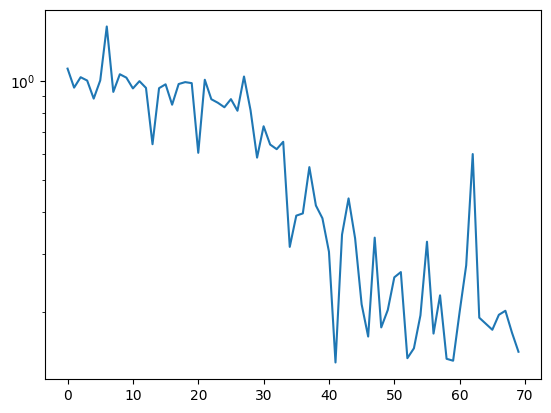

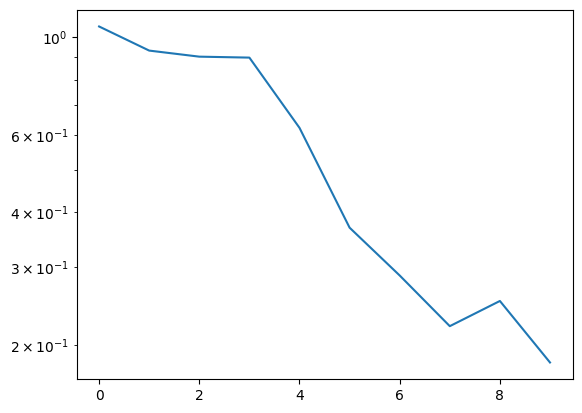

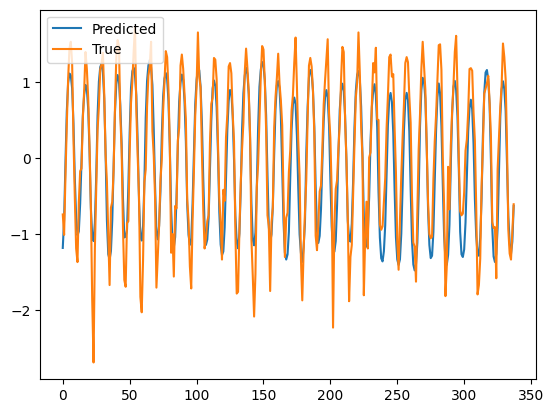

In [26]:
# main
import typing
from typing import Tuple
import json
import os

import torch
from torch import nn
from torch import optim
from sklearn.preprocessing import StandardScaler
import joblib


logger = utils.setup_log()
logger.info(f"Using computation device: {constants.device}")


def preprocess_data(dat, col_names) -> Tuple[custom_types.TrainData, StandardScaler]:
    scale = StandardScaler().fit(dat)
    proc_dat = scale.transform(dat)

    mask = np.ones(proc_dat.shape[1], dtype=bool)
    dat_cols = list(dat.columns)
    for col_name in col_names:
        mask[dat_cols.index(col_name)] = False

    feats = proc_dat[:, mask]
    targs = proc_dat[:, ~mask]

    return custom_types.TrainData(feats, targs), scale


def da_rnn(train_data: custom_types.TrainData, n_targs: int, encoder_hidden_size=64, decoder_hidden_size=64,
           T=10, learning_rate=0.01, batch_size=128):

    train_cfg = custom_types.TrainConfig(T, int(train_data.feats.shape[0] * 0.7), batch_size, nn.MSELoss())
    logger.info(f"Training size: {train_cfg.train_size:d}.")

    enc_kwargs = {"input_size": train_data.feats.shape[1], "hidden_size": encoder_hidden_size, "T": T}
    encoder = modules.Encoder(**enc_kwargs).to(constants.device)
    #with open(os.path.join("data", "enc_kwargs.json"), "w") as fi:
    #    json.dump(enc_kwargs, fi, indent=4)
    dec_kwargs = {"encoder_hidden_size": encoder_hidden_size,
                  "decoder_hidden_size": decoder_hidden_size, "T": T, "out_feats": n_targs}
    decoder = modules.Decoder(**dec_kwargs).to(constants.device)
    #with open(os.path.join("data", "dec_kwargs.json"), "w") as fi:
    #    json.dump(dec_kwargs, fi, indent=4)

    encoder_optimizer = optim.Adam(
        params=[p for p in encoder.parameters() if p.requires_grad],
        lr=learning_rate)
    decoder_optimizer = optim.Adam(
        params=[p for p in decoder.parameters() if p.requires_grad],
        lr=learning_rate)
    da_rnn_net = custom_types.DaRnnNet(encoder, decoder, encoder_optimizer, decoder_optimizer)

    return train_cfg, da_rnn_net


def train(net: custom_types.DaRnnNet, train_data: custom_types.TrainData, t_cfg: custom_types.TrainConfig, n_epochs=10, save_plots=False):
    iter_per_epoch = int(np.ceil(t_cfg.train_size * 1. / t_cfg.batch_size))
    iter_losses = np.zeros(n_epochs * iter_per_epoch)
    epoch_losses = np.zeros(n_epochs)
    logger.info(f"Iterations per epoch: {t_cfg.train_size * 1. / t_cfg.batch_size:3.3f} ~ {iter_per_epoch:d}.")

    n_iter = 0

    for e_i in range(n_epochs):
        perm_idx = np.random.permutation(t_cfg.train_size - t_cfg.T)

        for t_i in range(0, t_cfg.train_size, t_cfg.batch_size):
            batch_idx = perm_idx[t_i:(t_i + t_cfg.batch_size)]
            feats, y_history, y_target = prep_train_data(batch_idx, t_cfg, train_data)

            loss = train_iteration(net, t_cfg.loss_func, feats, y_history, y_target)
            iter_losses[e_i * iter_per_epoch + t_i // t_cfg.batch_size] = loss
            # if (j / t_cfg.batch_size) % 50 == 0:
            #    self.logger.info("Epoch %d, Batch %d: loss = %3.3f.", i, j / t_cfg.batch_size, loss)
            n_iter += 1

            adjust_learning_rate(net, n_iter)

        epoch_losses[e_i] = np.mean(iter_losses[range(e_i * iter_per_epoch, (e_i + 1) * iter_per_epoch)])

        if e_i % 10 == 0:
            y_test_pred = predict(net, train_data,
                                  t_cfg.train_size, t_cfg.batch_size, t_cfg.T,
                                  on_train=False)
            # TODO: make this MSE and make it work for multiple inputs
            val_loss = y_test_pred - train_data.targs[t_cfg.train_size:]
            logger.info(f"Epoch {e_i:d}, train loss: {epoch_losses[e_i]:3.3f}, val loss: {np.mean(np.abs(val_loss))}.")
            y_train_pred = predict(net, train_data,
                                   t_cfg.train_size, t_cfg.batch_size, t_cfg.T,
                                   on_train=True)
            plt.figure()
            plt.plot(range(1, 1 + len(train_data.targs)), train_data.targs,
                     label="True")
            plt.plot(range(t_cfg.T, len(y_train_pred) + t_cfg.T), y_train_pred,
                     label='Predicted - Train')
            plt.plot(range(t_cfg.T + len(y_train_pred), len(train_data.targs) + 1), y_test_pred,
                     label='Predicted - Test')
            plt.legend(loc='upper left')
            #utils.save_or_show_plot(f"pred_{e_i}.png", save_plots)

    return iter_losses, epoch_losses


def prep_train_data(batch_idx: np.ndarray, t_cfg: custom_types.TrainConfig, train_data: custom_types.TrainData):
    feats = np.zeros((len(batch_idx), t_cfg.T - 1, train_data.feats.shape[1]))
    y_history = np.zeros((len(batch_idx), t_cfg.T - 1, train_data.targs.shape[1]))
    y_target = train_data.targs[batch_idx + t_cfg.T]

    for b_i, b_idx in enumerate(batch_idx):
        b_slc = slice(b_idx, b_idx + t_cfg.T - 1)
        feats[b_i, :, :] = train_data.feats[b_slc, :]
        y_history[b_i, :] = train_data.targs[b_slc]

    return feats, y_history, y_target


def adjust_learning_rate(net: custom_types.DaRnnNet, n_iter: int):
    # TODO: Where did this Learning Rate adjustment schedule come from?
    # Should be modified to use Cosine Annealing with warm restarts https://www.jeremyjordan.me/nn-learning-rate/
    if n_iter % 10000 == 0 and n_iter > 0:
        for enc_params, dec_params in zip(net.enc_opt.param_groups, net.dec_opt.param_groups):
            enc_params['lr'] = enc_params['lr'] * 0.9
            dec_params['lr'] = dec_params['lr'] * 0.9


def train_iteration(t_net: custom_types.DaRnnNet, loss_func: typing.Callable, X, y_history, y_target):
    t_net.enc_opt.zero_grad()
    t_net.dec_opt.zero_grad()

    input_weighted, input_encoded = t_net.encoder(utils.numpy_to_tvar(X))
    y_pred = t_net.decoder(input_encoded, utils.numpy_to_tvar(y_history))

    y_true = utils.numpy_to_tvar(y_target)
    loss = loss_func(y_pred, y_true)
    loss.backward()

    t_net.enc_opt.step()
    t_net.dec_opt.step()

    return loss.item()


def predict(t_net: custom_types.DaRnnNet, t_dat: custom_types.TrainData, train_size: int, batch_size: int, T: int, on_train=False):
    out_size = t_dat.targs.shape[1]
    if on_train:
        y_pred = np.zeros((train_size - T + 1, out_size))
    else:
        y_pred = np.zeros((t_dat.feats.shape[0] - train_size, out_size))

    for y_i in range(0, len(y_pred), batch_size):
        y_slc = slice(y_i, y_i + batch_size)
        batch_idx = range(len(y_pred))[y_slc]
        b_len = len(batch_idx)
        X = np.zeros((b_len, T - 1, t_dat.feats.shape[1]))
        y_history = np.zeros((b_len, T - 1, t_dat.targs.shape[1]))

        for b_i, b_idx in enumerate(batch_idx):
            if on_train:
                idx = range(b_idx, b_idx + T - 1)
            else:
                idx = range(b_idx + train_size - T, b_idx + train_size - 1)

            X[b_i, :, :] = t_dat.feats[idx, :]
            y_history[b_i, :] = t_dat.targs[idx]

        y_history = utils.numpy_to_tvar(y_history)
        _, input_encoded = t_net.encoder(utils.numpy_to_tvar(X))
        y_pred[y_slc] = t_net.decoder(input_encoded, y_history).cpu().data.numpy()

    return y_pred


save_plots = True
debug = False

raw_data = cleaned_data
logger.info(f"Shape of data: {raw_data.shape}.\nMissing in data: {raw_data.isnull().sum().sum()}.")
targ_cols = ("MEAN_TEMP_C",)
data, scaler = preprocess_data(raw_data, targ_cols)

da_rnn_kwargs = {"batch_size": 128, "T": 10}
config, model = da_rnn(data, n_targs=len(targ_cols), learning_rate=.001, **da_rnn_kwargs)
iter_loss, epoch_loss = train(model, data, config, n_epochs=10, save_plots=save_plots)
final_y_pred = predict(model, data, config.train_size, config.batch_size, config.T)

plt.figure()
plt.semilogy(range(len(iter_loss)), iter_loss)
#utils.save_or_show_plot("iter_loss.png", save_plots)

plt.figure()
plt.semilogy(range(len(epoch_loss)), epoch_loss)
#utils.save_or_show_plot("epoch_loss.png", save_plots)

plt.figure()
plt.plot(final_y_pred, label='Predicted')
plt.plot(data.targs[config.train_size:], label="True")
plt.legend(loc='upper left')
#utils.save_or_show_plot("final_predicted.png", save_plots)

#with open(os.path.join("data", "da_rnn_kwargs.json"), "w") as fi:
#    json.dump(da_rnn_kwargs, fi, indent=4)

#joblib.dump(scaler, os.path.join("data", "scaler.pkl"))
#torch.save(model.encoder.state_dict(), os.path.join("data", "encoder.torch"))
#torch.save(model.decoder.state_dict(), os.path.join("data", "decoder.torch"))
